<a href="https://colab.research.google.com/github/adalahardana/hasil-kuliah/blob/main/Statistika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ====== Segment 1: Import & Load ======
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

from google.colab import files
uploaded = files.upload()


df = pd.read_excel("DataNewStatistika.xlsx")
print("Data awal:")
display(df.head())


Saving DataNewStatistika.xlsx to DataNewStatistika.xlsx
Data awal:


,nama_balita,jenis_kelamin,nama_ayah,nama_ibu,tanggal_lahir,RT,posyandu,tahun1,tahun2,tahun3,tahun4,tahun5,riwayat_penyakit,status
0,Asifa Putri,P,Cipto Saputra,Mega Saputri,2008-06-16,4,Posyandu Tulip,8.5,11.2,14.1,15.8,18.6,NaN,Sehat
1,Nadira,P,Agus Susanto,Sri Utomo,2015-10-26,5,Posyandu Melati,11.4,12.5,14.4,15.7,17.7,NaN,Sehat
2,Miftahul Nurul,P,Rahman Saputra,Lestari Firmansyah,2017-07-07,3,Posyandu Bugenvil,7.2,10.6,12.4,15.4,16.9,NaN,Sehat
3,Tania,P,Andi Santoso,Maya Firmansyah,2009-12-19,1,Posyandu Melati,11.7,14.1,14.9,16.9,19.2,NaN,Sehat
4,Hana,P,Galih Gunawan,Siska Wijaya,2009-04-26,4,Posyandu Bugenvil,9.1,11.6,12.5,14.8,18.3,NaN,Sehat


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   nama_balita       350 non-null    object        
 1   jenis_kelamin     350 non-null    object        
 2   nama_ayah         350 non-null    object        
 3   nama_ibu          350 non-null    object        
 4   tanggal_lahir     350 non-null    datetime64[ns]
 5   RT                350 non-null    int64         
 6   posyandu          350 non-null    object        
 7   tahun1            350 non-null    float64       
 8   tahun2            350 non-null    float64       
 9   tahun3            350 non-null    float64       
 10  tahun4            350 non-null    float64       
 11  tahun5            350 non-null    float64       
 12  riwayat_penyakit  46 non-null     object        
 13  status            350 non-null    object        
dtypes: datetime64[ns](1), floa

,tanggal_lahir,RT,tahun1,tahun2,tahun3,tahun4,tahun5
count,350,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,2012-05-30 18:43:12,3.900000,9.502286,11.976857,13.753714,15.544000,17.605429
min,2007-01-03 00:00:00,1.000000,6.100000,9.200000,10.500000,11.500000,13.100000
25%,2009-04-30 06:00:00,2.000000,8.800000,11.300000,13.100000,14.800000,16.900000
50%,2012-06-20 00:00:00,4.000000,9.500000,11.900000,13.800000,15.600000,17.700000
75%,2015-03-31 18:00:00,5.000000,10.200000,12.600000,14.500000,16.300000,18.400000
max,2017-12-18 00:00:00,8.000000,12.500000,15.000000,16.300000,18.600000,20.700000
std,NaN,2.042177,1.043877,0.998886,1.039961,1.095082,1.152274


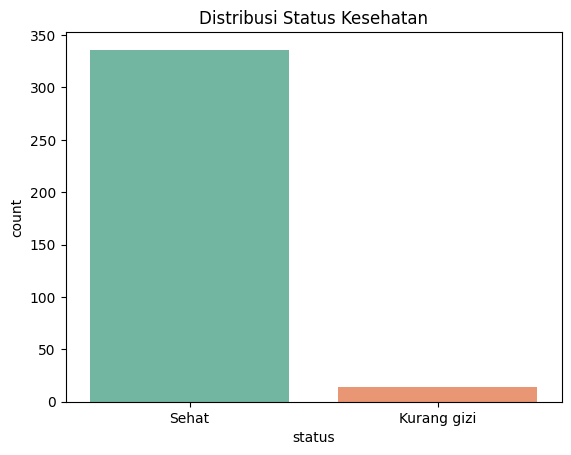

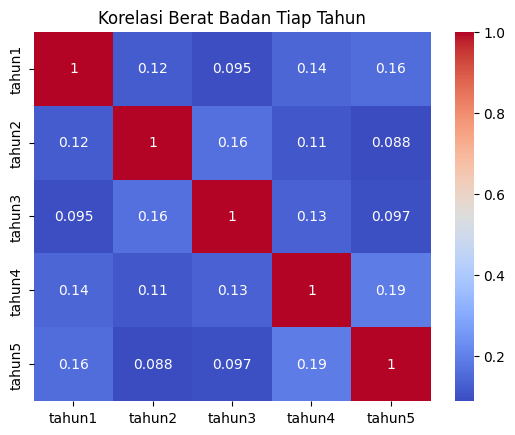

In [2]:
# ====== Segment 2: EDA ======
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
display(df.describe())

# Distribusi status kesehatan
sns.countplot(data=df, x='status', palette='Set2')
plt.title('Distribusi Status Kesehatan')
plt.show()

# Korelasi antar berat badan
tahun_cols = ['tahun1','tahun2','tahun3','tahun4','tahun5']
sns.heatmap(df[tahun_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Berat Badan Tiap Tahun')
plt.show()


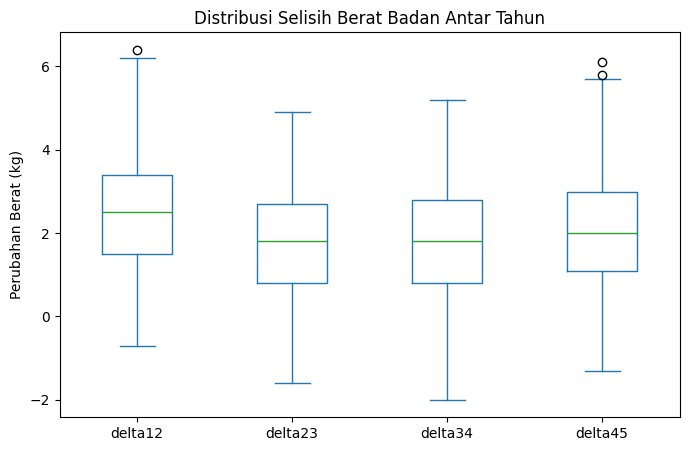

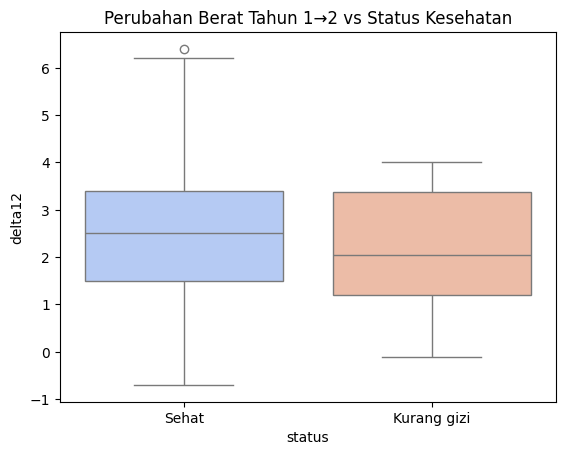

In [3]:
# ====== Segment 3: Fitur Selisih Berat Badan ======
# Hitung selisih antar tahun
df['delta12'] = df['tahun2'] - df['tahun1']
df['delta23'] = df['tahun3'] - df['tahun2']
df['delta34'] = df['tahun4'] - df['tahun3']
df['delta45'] = df['tahun5'] - df['tahun4']

# Visualisasi perubahan berat badan
delta_cols = ['delta12','delta23','delta34','delta45']
df[delta_cols].plot(kind='box', figsize=(8,5))
plt.title('Distribusi Selisih Berat Badan Antar Tahun')
plt.ylabel('Perubahan Berat (kg)')
plt.show()

# Cek tren pertumbuhan dengan status
sns.boxplot(data=df, x='status', y='delta12', palette='coolwarm')
plt.title('Perubahan Berat Tahun 1→2 vs Status Kesehatan')
plt.show()


In [7]:
# ====== Segment 4: Preprocessing (Fix Final) ======

# Isi nilai kosong riwayat penyakit (kalau ada)
df['riwayat_penyakit'] = df['riwayat_penyakit'].fillna('tidak ada')

# Encode kategori
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

# Pastikan kolom teks tidak ada spasi kosong
df['riwayat_penyakit'] = np.where(df['riwayat_penyakit'].astype(str).str.strip() == '',
                                  'tidak ada', df['riwayat_penyakit'])

df['riwayat_penyakit'] = le.fit_transform(df['riwayat_penyakit'])
df['status'] = le.fit_transform(df['status'])

# Pilih fitur (selisih berat + riwayat penyakit)
delta_cols = ['delta12', 'delta23', 'delta34', 'delta45']
X = df[delta_cols + ['riwayat_penyakit']]
y = df['status']

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("✅ Data siap untuk modeling")
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji   : {X_test.shape[0]}")


✅ Data siap untuk modeling
Jumlah data latih: 280
Jumlah data uji   : 70


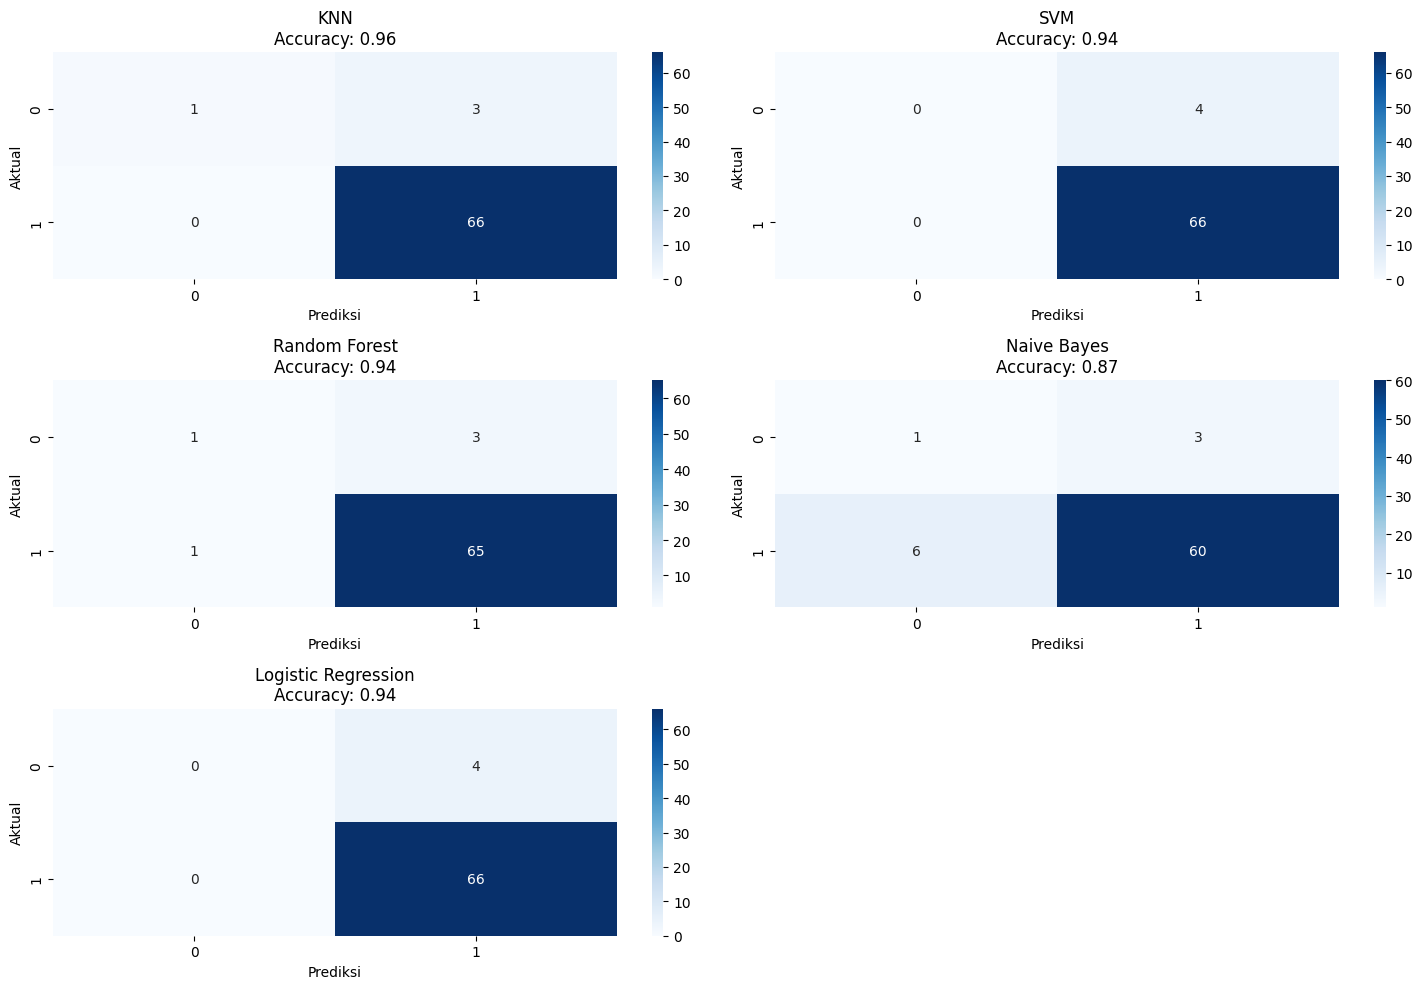

In [8]:
# ====== Segment 5: Modeling ======
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression()
}

results = {}
plt.figure(figsize=(15,10))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(3,2,i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name}\nAccuracy: {acc:.2f}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')

plt.tight_layout()
plt.show()


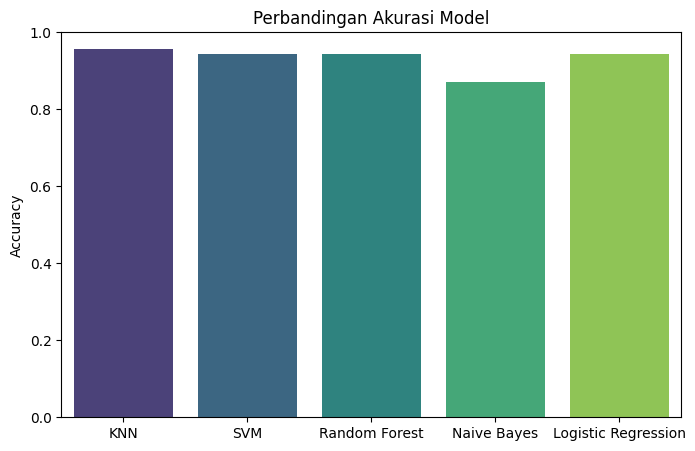

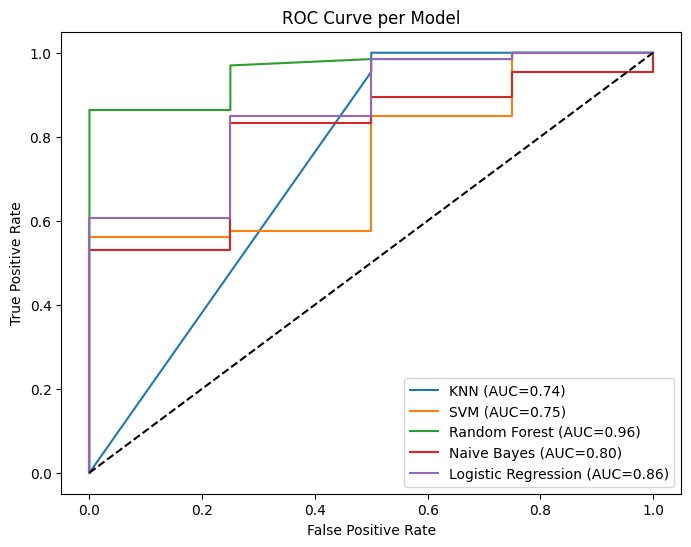

In [9]:
# ====== Segment 6: Evaluasi ======
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

# ROC Curve
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curve per Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


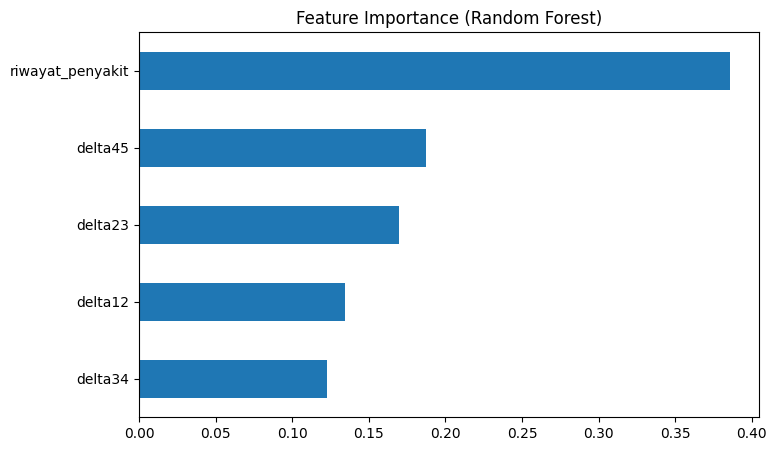


Feature importance menunjukkan variabel yang paling berpengaruh terhadap status kesehatan:


,0
riwayat_penyakit,0.385634
delta45,0.187196
delta23,0.169533
delta12,0.134707
delta34,0.122929


In [10]:
# ====== Segment 7: Interpretasi ======
rf = models['Random Forest']
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title('Feature Importance (Random Forest)')
plt.show()

print("\nFeature importance menunjukkan variabel yang paling berpengaruh terhadap status kesehatan:")
display(feat_importances.sort_values(ascending=False))
